In [60]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import country_converter as coco
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [61]:
file_path = "number-of-internet-users.csv"
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "willianoliveiragibin/people-who-used-the-internet",
  file_path,
)
df

,country,Year,Number of Internet users
0,Afghanistan,1990,0.0
1,Afghanistan,1991,0.0
2,Afghanistan,1992,0.0
3,Afghanistan,1993,0.0
4,Afghanistan,1994,0.0
...,...,...,...
6888,Zimbabwe,2017,3614246.0
6889,Zimbabwe,2018,3758614.2
6890,Zimbabwe,2019,4060395.5
6891,Zimbabwe,2020,4549155.0


In [62]:
df.rename(columns={"country ":"country"},inplace=True)

In [63]:
df.describe()

,Year,Number of Internet users
count,6893.000000,6.893000e+03
mean,2004.543160,2.967408e+07
std,10.240126,1.949894e+08
min,1960.000000,0.000000e+00
25%,1997.000000,5.972474e+03
50%,2005.000000,2.311677e+05
75%,2013.000000,3.625811e+06
max,2021.000000,5.016978e+09


### Checking if the dataset contains empty data width isnull()

In [64]:
df.isnull().sum()

country                     0
Year                        0
Number of Internet users    0
dtype: int64

### Checking the most frequently used locations

In [65]:
df["country"].value_counts().head(15)

country
Low-income countries             50
Grenada                          50
Maldives                         50
Africa                           50
Burundi                          50
Thailand                         50
Togo                             50
Asia                             50
Botswana                         50
North America                    50
Upper-middle-income countries    50
Syria                            49
Nepal                            33
Lower-middle-income countries    33
Namibia                          32
Name: count, dtype: int64

### Years with more records

In [66]:
df["Year"].value_counts(ascending=False).head(15)

Year
1990    219
1992    219
1993    219
1994    219
1995    219
1991    219
2017    216
2007    215
2011    215
2016    214
2012    213
2009    213
2008    213
2002    213
2010    212
Name: count, dtype: int64

### to find out in which year there were the most internet users

In [67]:
df.sort_values(by=["Number of Internet users","Year"],ascending=False).head(15)

,country,Year,Number of Internet users
6800,World,2021,5.016978e+09
6799,World,2020,4.698218e+09
6798,World,2019,4.198484e+09
6797,World,2018,3.799832e+09
6796,World,2017,3.482049e+09
6795,World,2016,3.266503e+09
6794,World,2015,3.008372e+09
6793,World,2014,2.796214e+09
377,Asia,2021,2.753528e+09
376,Asia,2020,2.603488e+09


In [68]:
df.sort_values(by=["Year","Number of Internet users"])

,country,Year,Number of Internet users
26,Africa,1960,0.000000e+00
328,Asia,1960,0.000000e+00
840,Botswana,1960,0.000000e+00
1031,Burundi,1960,0.000000e+00
2499,Grenada,1960,0.000000e+00
...,...,...,...
2765,High-income countries,2021,1.238927e+09
3685,Lower-middle-income countries,2021,1.417015e+09
6612,Upper-middle-income countries,2021,2.062960e+09
377,Asia,2021,2.753528e+09


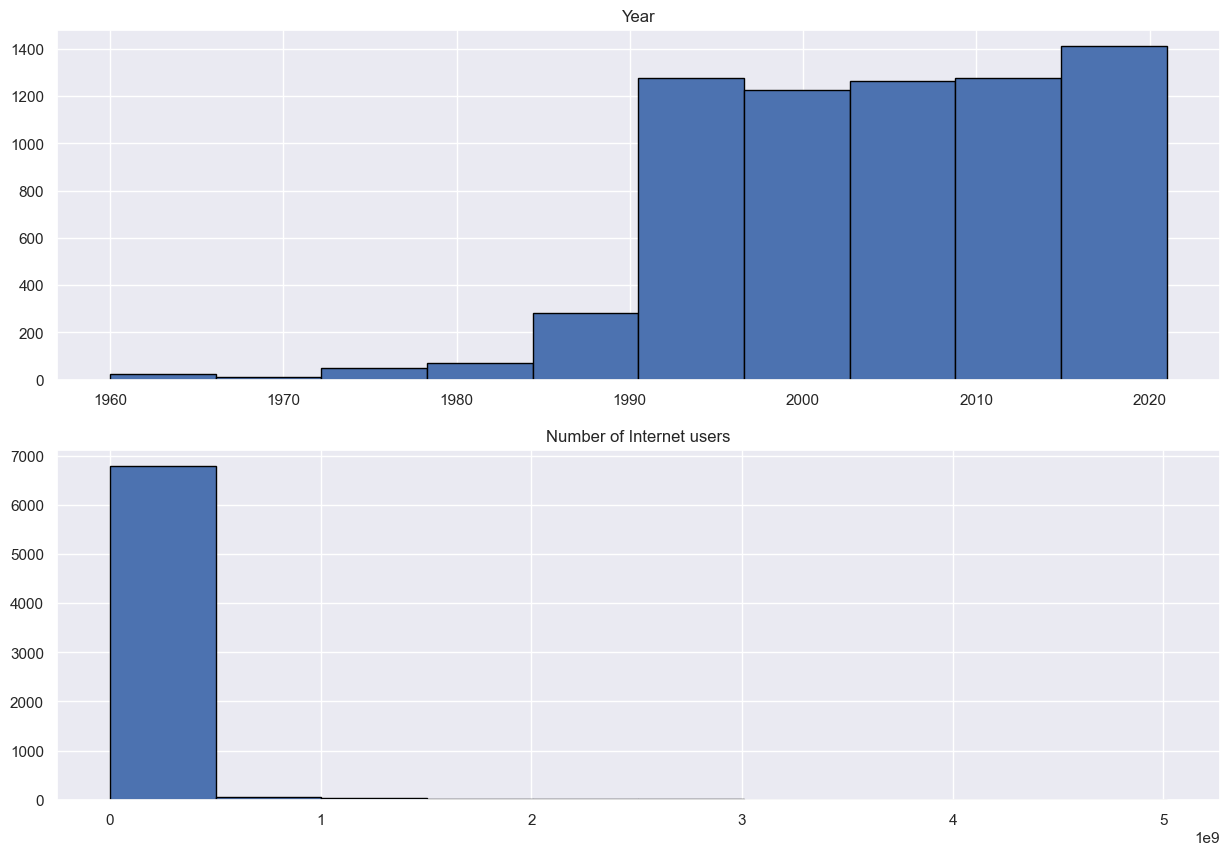

In [69]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,10))
ax1 = ax[0]
ax2 = ax[1]

ax1.set_title("Year")
ax1.hist(df["Year"],edgecolor="Black")

ax2.set_title("Number of Internet users")
ax2.hist(df["Number of Internet users"],edgecolor="Black");

## On which continent were the most countries registered?
In this case, the continents with the most records are Africa, Asia, and Europe. 
In this case, the continents with the most records are Africa, Asia, and Europe. 
The `country_converter` library was used to categorize the countries into their respective continents, and `value_counts` was used to list them.

In [70]:
df_continentes = df.copy()
df_continentes["Continentes"] = coco.convert(
    names=df['country'],  # La columna que contiene los nombres de los países
    src='regex',             # Indica que el nombre del país debe buscarse usando expresiones regulares (más flexible)
    to='continent',           # Indica que el resultado deseado es el nombre del continente
    not_found=None
)
df_continentes

Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not found in regex
Africa not f

,country,Year,Number of Internet users,Continentes
0,Afghanistan,1990,0.0,Asia
1,Afghanistan,1991,0.0,Asia
2,Afghanistan,1992,0.0,Asia
3,Afghanistan,1993,0.0,Asia
4,Afghanistan,1994,0.0,Asia
...,...,...,...,...
6888,Zimbabwe,2017,3614246.0,Africa
6889,Zimbabwe,2018,3758614.2,Africa
6890,Zimbabwe,2019,4060395.5,Africa
6891,Zimbabwe,2020,4549155.0,Africa


In [35]:
df_continentes["Continentes"].value_counts()

Continentes
Africa                           1755
Asia                             1629
Europe                           1383
America                          1305
Oceania                           510
Low-income countries               50
North America                      50
Upper-middle-income countries      50
Lower-middle-income countries      33
European Union (27)                32
High-income countries              32
South America                      32
World                              32
Name: count, dtype: int64

In [71]:
df_continentes.to_csv("C:/Users/EfrenMariscal/Downloads/internetUsers.csv", index=False) 

## Visualize the data across the years
To do this we use the dataframe containing the continents and we use a scatter plot to graph the categorical and numerical variables

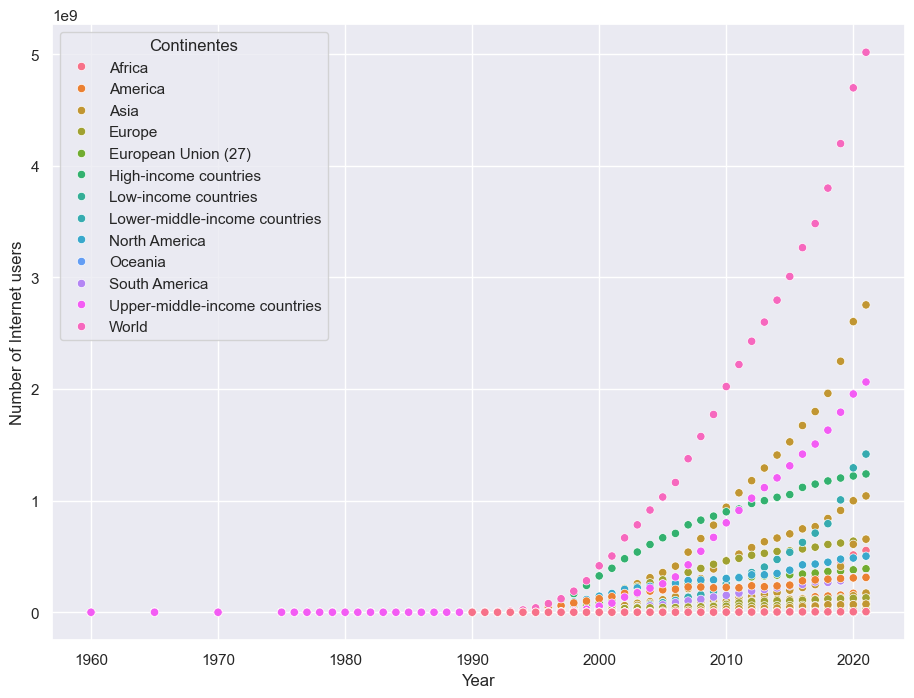

In [72]:
df_continentes["Continentes"] = df_continentes["Continentes"].astype(str)
df_continentes["Continentes"] = df_continentes["Continentes"].str.strip()
df_continentes["Continentes"] = df_continentes["Continentes"].astype('category')
sns.set(rc={'figure.figsize':(11, 8)})
sns.scatterplot(data=df_continentes,x="Year",y="Number of Internet users",hue="Continentes");

## Selecting the continents reported in the dataset
The previous graph shows data for each continent, but it also shows the countries to which each country belongs. This is problematic because it shows the growth of each country grouped within each continent.
This new graph uses the data for the continents reported in the dataset.

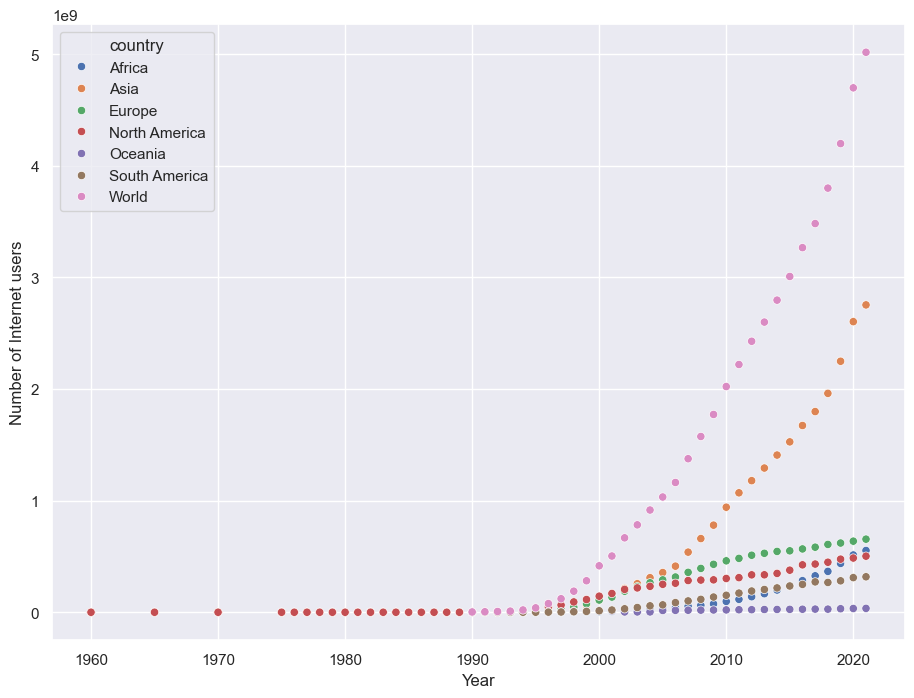

In [73]:
continentes_a_seleccionar = ["Asia", "Europe", "Africa","Oceania","North America","South America","World"]
df_cont = df.loc[df["country"].isin(continentes_a_seleccionar)].copy()
sns.scatterplot(data=df_cont,x="Year",y="Number of Internet users",hue="country");

## Looking for a model to predict user growth worldwide

In [74]:
df_world = df.loc[df["country"] == "World"].copy()
X=df_world.drop(["Number of Internet users","country"],axis=1)
y=df_world["Number of Internet users"]
df_world.sort_values(by="Number of Internet users",ascending=False).head(10)

,country,Year,Number of Internet users
6800,World,2021,5.016978e+09
6799,World,2020,4.698218e+09
6798,World,2019,4.198484e+09
6797,World,2018,3.799832e+09
6796,World,2017,3.482049e+09
6795,World,2016,3.266503e+09
6794,World,2015,3.008372e+09
6793,World,2014,2.796214e+09
6792,World,2013,2.599470e+09
6791,World,2012,2.427767e+09


In [75]:
X_entrena,X_prueba,y_entrena,y_prueba = train_test_split(X,y,train_size=0.7,random_state=42)
lineal=LinearRegression()
lineal.fit(X_entrena,y_entrena)
lineal.score(X_entrena,y_entrena)

0.9264304752952796

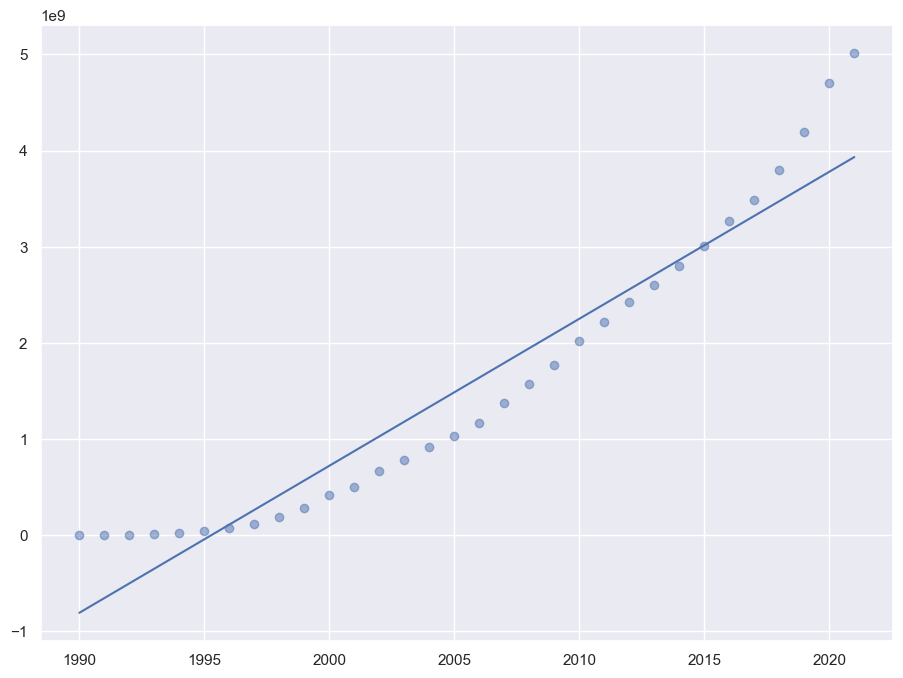

In [76]:
predecir = lineal.predict(X_prueba)
plt.scatter(x=df_world["Year"],y=df_world["Number of Internet users"],alpha=0.5)
plt.plot(df_world["Year"],lineal.predict(df_world[["Year"]]));

In [77]:
bosque = RandomForestRegressor(random_state=42)
bosque.fit(X_entrena,y_entrena)
bosque.score(X_entrena,y_entrena)

0.9925326279551918

In [78]:
bosque.score(X_prueba,y_prueba)

0.9895131679328792

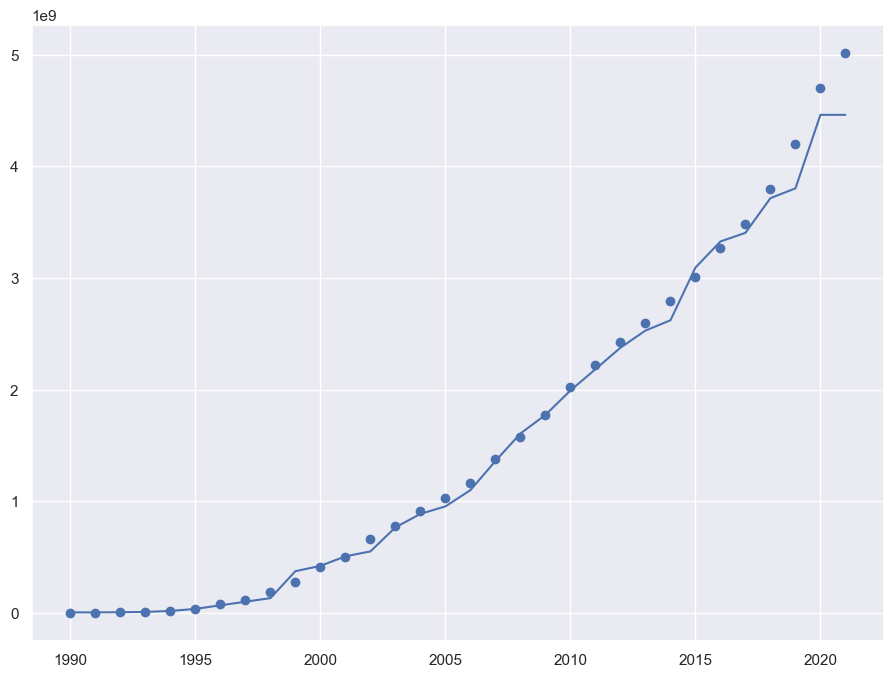

In [79]:
plt.scatter(x=df_world["Year"],y=df_world["Number of Internet users"])
plt.plot(df_world["Year"],bosque.predict(df_world[["Year"]]));

In [80]:
X = df_world["Year"].values
y = df_world["Number of Internet users"].values
coef = np.polyfit(X, y, deg=2)
poly_func = np.poly1d(coef)
future_years = np.arange(X.max() + 1, 2036)
future_predictions = poly_func(future_years)
for year, pred in zip(future_years, future_predictions):
    print(f"Año {year}: {int(pred)} usuarios (estimado)")

Año 2022: 5204744161 usuarios (estimado)
Año 2023: 5549370945 usuarios (estimado)
Año 2024: 5905010768 usuarios (estimado)
Año 2025: 6271663630 usuarios (estimado)
Año 2026: 6649329530 usuarios (estimado)
Año 2027: 7038008469 usuarios (estimado)
Año 2028: 7437700447 usuarios (estimado)
Año 2029: 7848405463 usuarios (estimado)
Año 2030: 8270123519 usuarios (estimado)
Año 2031: 8702854612 usuarios (estimado)
Año 2032: 9146598745 usuarios (estimado)
Año 2033: 9601355916 usuarios (estimado)
Año 2034: 10067126126 usuarios (estimado)
Año 2035: 10543909374 usuarios (estimado)


## Conclusion
The linear regression and random forest machine learning models were not very accurate, as they are inaccurate when trying to predict the number of users in the future. This is because there are too few records to predict how each continent will grow, and also because the data growth is exponential. On the other hand, the polynomial function was a better fit for predicting global user growth.